In [7]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import DiadFit as pf

## Load pickles for CMASS (as it was until 10/17/23)

In [37]:
pickle_file_path=r"C:\Users\charl\Documents\Python dev\DiadFit\docs\Cornell_Densimeter_fitting\CMASS\Lowrho_polyfit_data_CMASS.pkl"
with open(pickle_file_path, 'rb') as file:
    loweq = pickle.load(file)['model']

pickle_file_path=r"C:\Users\charl\Documents\Python dev\DiadFit\docs\Cornell_Densimeter_fitting\CMASS\Mediumrho_polyfit_data_CMASS.pkl"
with open(pickle_file_path, 'rb') as file:
    medeq = pickle.load(file)['model']

pickle_file_path=r"C:\Users\charl\Documents\Python dev\DiadFit\docs\Cornell_Densimeter_fitting\CMASS\Highrho_polyfit_data_CMASS.pkl"
with open(pickle_file_path, 'rb') as file:
    hieq = pickle.load(file)['model']

# print(round(loweq(102.72),2))
# print(round(loweq(103.25),2))
# print(round(medeq(103.06),2))
# print(round(medeq(104.33),2))
# print(round(hieq(104.23),2))
# print(round(hieq(104.95),2))

## Load pickles for CMASS (including august 2021 data)

In [38]:
pickle_file_path=r"C:\Users\charl\Documents\Python dev\DiadFit\docs\Cornell_Densimeter_fitting\CMASS\Lowrho_polyfit_data_CMASS_waug.pkl"
with open(pickle_file_path, 'rb') as file:
    loweq_waug = pickle.load(file)['model']

pickle_file_path=r"C:\Users\charl\Documents\Python dev\DiadFit\docs\Cornell_Densimeter_fitting\CMASS\Mediumrho_polyfit_data_CMASS_waug.pkl"
with open(pickle_file_path, 'rb') as file:
    medeq_waug = pickle.load(file)['model']

pickle_file_path=r"C:\Users\charl\Documents\Python dev\DiadFit\docs\Cornell_Densimeter_fitting\CMASS\Highrho_polyfit_data_CMASS_waug.pkl"
with open(pickle_file_path, 'rb') as file:
    hieq_waug = pickle.load(file)['model']

## Load CCMR pickles

In [4]:
pickle_file_path=r"C:\Users\charl\Documents\Python dev\DiadFit\docs\Cornell_Densimeter_fitting\CCMR\Lowrho_polyfit_data_CCMR.pkl"
with open(pickle_file_path, 'rb') as file:
    loweq_ccmr = pickle.load(file)['model']

pickle_file_path=r"C:\Users\charl\Documents\Python dev\DiadFit\docs\Cornell_Densimeter_fitting\CCMR\Mediumrho_polyfit_data_CCMR.pkl"
with open(pickle_file_path, 'rb') as file:
    medeq_ccmr = pickle.load(file)['model']

pickle_file_path=r"C:\Users\charl\Documents\Python dev\DiadFit\docs\Cornell_Densimeter_fitting\CCMR\Highrho_polyfit_data_CCMR.pkl"
with open(pickle_file_path, 'rb') as file:
    hieq_ccmr = pickle.load(file)['model']

## Now calculate densities for a set of splits

In [40]:
splits=pd.Series(np.linspace(102.72,104.95,100))


def dens_calc(*,loweq,medeq,higheq,splits):

    y=pd.Series(np.nan,index=splits)
    data = []
    for x in splits:
        if x < 103.06:
            y = loweq(x)
        elif 103.06 <= x <= 104.33:
            y = medeq(x)
        else:
            y = higheq(x)
        
        data.append({'Splits': x, 'density': y})
        data_df=pd.DataFrame(data)
    return data_df


dens_waug=dens_calc(loweq=loweq_waug,medeq=medeq_waug,higheq=hieq_waug,splits=splits)
dens_apr=dens_calc(loweq=loweq,medeq=medeq,higheq=hieq,splits=splits)
dens_ccmr=dens_calc(loweq=loweq_ccmr,medeq=medeq_ccmr,higheq=hieq_ccmr,splits=splits)

jmp_densities=pf.calculate_density_cornell(temp='SupCrit',Split=splits)
jmp_dens=jmp_densities[['Preferred D','Splitting']].rename(columns={'Preferred D': 'density', 'Splitting': 'Splits'})

## Now plot all equations to compare

(0.65, 0.95)

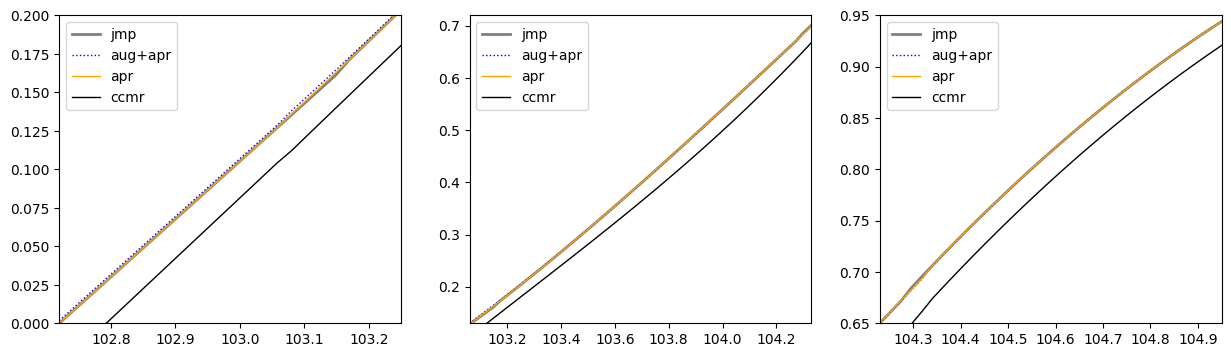

In [41]:
fig,axes=plt.subplots(1,3,figsize=(15,4))

for ax in axes:
    ax.plot(jmp_dens['Splits'],jmp_dens['density'],label='jmp',linewidth=2,color='grey')
    ax.plot(dens_waug['Splits'],dens_waug['density'],label='aug+apr',linewidth=1,color='blue',linestyle=':')
    ax.plot(dens_apr['Splits'],dens_apr['density'],label='apr',linewidth=1,color='orange')
    ax.plot(dens_ccmr['Splits'],dens_ccmr['density'],label='ccmr',linewidth=1,color='k')
    ax.legend(loc='best')

axes[0].set_xlim([102.72,103.25])
axes[1].set_xlim([103.06,104.33])
axes[2].set_xlim([104.23,104.95])

axes[0].set_ylim([0,0.2])
axes[1].set_ylim([0.13,0.72])
axes[2].set_ylim([0.65,0.95])
